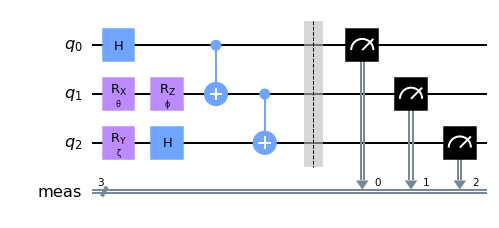

In [20]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection
import matplotlib.pyplot as plt
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import Counter
from tensorflow import keras
from tensorflow.keras import layers, models
import pandas as pd

# Create a parameterized quantum circuit with 3 qubits
theta = Parameter('θ')
phi = Parameter('ϕ')
zeta = Parameter('ζ')
qc = QuantumCircuit(3)
qc.h(0)
qc.rx(theta, 1)
qc.rz(phi, 1)
qc.ry(zeta, 2)
qc.h(2)
qc.cx(0, 1)
qc.cx(1, 2)
qc.measure_all()

# Display the circuit
qc.draw('mpl')


/var/folders/d1/bzn2sb0n0cqdk4hd51fyhb6r0000gn/T/ipykernel_2861/2992876934.py:14: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  bound_circuit = qc.bind_parameters({theta: theta_val, phi: phi_val, zeta: zeta_val})


Result for θ = 0.00, ϕ = 0.00, ζ = 0.00: {'100': 269, '011': 271, '000': 239, '111': 245}
Result for θ = 0.00, ϕ = 0.00, ζ = 0.70: {'100': 100, '011': 88, '000': 411, '111': 425}
Result for θ = 0.00, ϕ = 0.00, ζ = 1.40: {'100': 5, '011': 4, '000': 479, '111': 536}
Result for θ = 0.00, ϕ = 0.00, ζ = 2.09: {'100': 37, '111': 460, '011': 33, '000': 494}
Result for θ = 0.00, ϕ = 0.00, ζ = 2.79: {'100': 174, '111': 342, '011': 170, '000': 338}
Result for θ = 0.00, ϕ = 0.00, ζ = 3.49: {'111': 156, '100': 335, '000': 180, '011': 353}
Result for θ = 0.00, ϕ = 0.00, ζ = 4.19: {'111': 39, '011': 483, '000': 33, '100': 469}
Result for θ = 0.00, ϕ = 0.00, ζ = 4.89: {'111': 5, '000': 9, '011': 518, '100': 492}
Result for θ = 0.00, ϕ = 0.00, ζ = 5.59: {'111': 80, '000': 86, '011': 439, '100': 419}
Result for θ = 0.00, ϕ = 0.00, ζ = 6.28: {'111': 254, '011': 265, '000': 259, '100': 246}
Result for θ = 0.00, ϕ = 0.70, ζ = 0.00: {'100': 255, '111': 248, '011': 268, '000': 253}
Result for θ = 0.00, ϕ = 

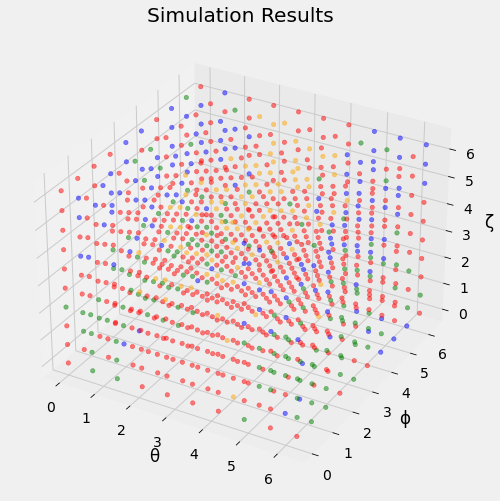

Simulation results have been exported to '3d_simulation_results.json'.


In [21]:
# Define a range of parameter values
theta_values = np.linspace(0, 2 * np.pi, 10)
phi_values = np.linspace(0, 2 * np.pi, 10)
zeta_values = np.linspace(0, 2 * np.pi, 10)

# Simulate the circuit for each combination of parameter values
simulator = Aer.get_backend('aer_simulator')
results = []

for theta_val in theta_values:
    for phi_val in phi_values:
        for zeta_val in zeta_values:
            # Set the parameter values
            bound_circuit = qc.bind_parameters({theta: theta_val, phi: phi_val, zeta: zeta_val})
            # Transpile the circuit for the simulator
            compiled_circuit = transpile(bound_circuit, simulator)
            # Run the simulation
            result = simulator.run(compiled_circuit).result()
            # Get the counts of the result
            counts = result.get_counts()
            results.append((theta_val, phi_val, zeta_val, counts))

x_coords = []
y_coords = []
z_coords = []
colors = []

for theta_val, phi_val, zeta_val, result in results:
    # Print the result
    print(f'Result for θ = {theta_val:.2f}, ϕ = {phi_val:.2f}, ζ = {zeta_val:.2f}: {result}')
    
    # Determine the color based on the most frequent outcome
    max_state = max(result, key=result.get)
    if max_state == '000':
        color = 'green'
    elif max_state == '100':
        color = 'blue'
    elif max_state == '101':
        color = 'orange'
    else:
        color = 'red'
    
    # Append the coordinates and color to the arrays
    x_coords.append(theta_val)
    y_coords.append(phi_val)
    z_coords.append(zeta_val)
    colors.append(color)


# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_coords, y_coords, z_coords, c=colors, alpha=0.5)
ax.set_xlabel('θ')
ax.set_ylabel('ϕ')
ax.set_zlabel('ζ')
plt.title('Simulation Results')
plt.show()

# Prepare data for JSON export
data_for_export = []
for theta_val, phi_val, zeta_val, result in results:
    data_point = {
        'theta': theta_val,
        'phi': phi_val,
        'zeta': zeta_val,
        'result': result
    }
    data_for_export.append(data_point)

# Export to JSON file
with open('3d_simulation_results.json', 'w') as json_file:
    json.dump(data_for_export, json_file, indent=4)

# Inform the user that the data has been exported
print("Simulation results have been exported to '3d_simulation_results.json'.")


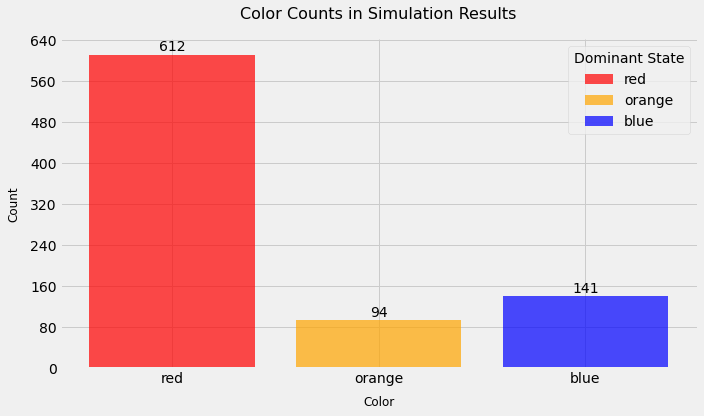

In [22]:
# Use a fancy style
plt.style.use('fivethirtyeight')

# Count the occurrences of each color
color_counts = Counter(colors)

# Extract colors and their counts for plotting
colors_for_plot = ['red', 'orange', 'blue']
counts_for_plot = [color_counts[color] for color in colors_for_plot]

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(colors_for_plot, counts_for_plot, color=colors_for_plot, alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom', color='black')

# Set labels, title, and legend
ax.set_xlabel('Color', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.set_title('Color Counts in Simulation Results', fontsize=16, pad=20)
ax.legend(bars, colors_for_plot, title='Dominant State')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Use integer y-axis labels
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


Epoch 1/200
20/20 [==============================] - 3s 11ms/step - loss: 0.0916 - val_loss: 0.0529
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0504 - val_loss: 0.0411
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0315 - val_loss: 0.0172
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0090
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 0.0085
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.0048
Epoch 7/200
20/20 [==============================] - 0s 7ms/step - loss: 0.0063 - val_loss: 0.0048
Epoch 8/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.0058
Epoch 9/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0033
Epoch 10/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0030
Epoch 11

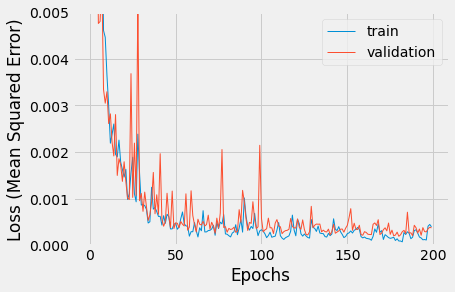

Actual value: 0.984375, Predicted value: 0.9794371128082275
Actual value: 1.0, Predicted value: 0.9962627291679382
Actual value: 0.8662109375, Predicted value: 0.8480415940284729
Actual value: 0.9228515625, Predicted value: 0.9311366081237793
Actual value: 0.98828125, Predicted value: 0.9778212308883667
Actual value: 0.9765625, Predicted value: 0.9595128893852234
Actual value: 0.9951171875, Predicted value: 0.9940743446350098
Actual value: 0.9814453125, Predicted value: 0.9891992807388306
Actual value: 0.7919921875, Predicted value: 0.80968177318573
Actual value: 0.974609375, Predicted value: 0.9487226605415344


In [23]:
# Assuming you have a DataFrame 'df' with 'theta', 'phi', 'zeta', and 'error_rate' columns
# Assuming 'results' is a list of tuples as before, containing parameter values and count dictionaries
# Assuming 'results' is a list of tuples as before, containing parameter values and count dictionaries
error_rates = []
for theta_val, phi_val, zeta_val, result in results:
    total_counts = sum(result.values())
    error_counts = total_counts - result.get('000', 0)  # Assuming '000' is the expected outcome
    error_rate = error_counts / total_counts
    error_rates.append(error_rate)

# Make sure the DataFrame is initialized with the correct number of rows
df = pd.DataFrame({
    'theta': [theta_val for theta_val, _, _, _ in results],
    'phi': [phi_val for _, phi_val, _, _ in results],
    'zeta': [zeta_val for _, _, zeta_val, _ in results],
    'error_rate': error_rates
})

# Prepare your data
X = df[['theta', 'phi', 'zeta']].values  # Features
y = df['error_rate'].values              # Target variable

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model with additional layers
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(3,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer: no activation, we want a regression output
])

# Compile the model
model.compile(optimizer='nadam', loss='mean_squared_error')

# Train the model with more epochs
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

# Predictions
predictions = model.predict(X_test)

# Plotting the history with adjusted y-axis limits
plt.plot(history.history['loss'], label='train', linewidth=1)
plt.plot(history.history['val_loss'], label='validation', linewidth=1)
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.ylim(0, 0.005)  # Set the y-axis limits to range from 0 to 0.1
plt.show()

# Compare actual vs predicted values (maybe for a few samples)
for i in range(10):
    print(f"Actual value: {y_test[i]}, Predicted value: {predictions[i][0]}")

